In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customers = pd.read_csv('drive/My Drive/vikii/data science project/Customers.csv')

In [4]:
products = pd.read_csv('drive/My Drive/vikii/data science project/Products.csv')

In [5]:
transactions = pd.read_csv('drive/My Drive/vikii/data science project/Transactions.csv')

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
customer_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary[['TotalValue', 'Quantity']])


In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_data)

In [10]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scaled_data, customer_summary['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.72127971818163


In [16]:
from sklearn.metrics import silhouette_score

In [17]:
silhouette_avg = silhouette_score(scaled_data, customer_summary['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.44975010590006376


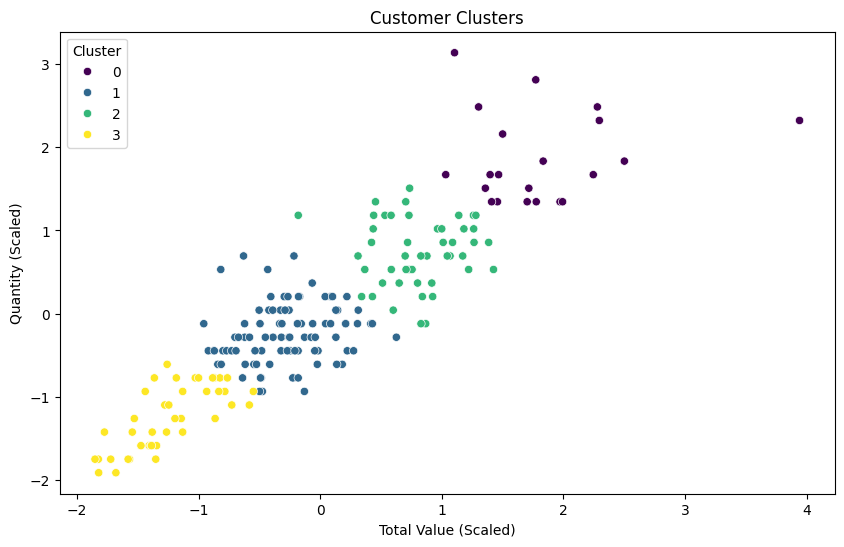

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=customer_summary['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Total Value (Scaled)')
plt.ylabel('Quantity (Scaled)')
plt.show()